# Deep Learning with PyTorch V (fashion mnist, mlp)
- Part 1: 


## 1. Introduction
In this notebook we will apply the previously methodology to a new dataset and build a model that predicts clothing type based on simplified images. Afterwards, we will check visually how this model performs on an unseen image.  

The objective is to build a model that performs well on unseen data and predicts clothing type based on a  xxx pixel image. Steps are: 

In [72]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

# torch imports
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

# visualization
import helper
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# time
from time import time

## 2. The data
We will use the torch api to load the fashion-mnist dataset, including the accompanied test data to validate our network. 

[Description by Zalando:](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/)  
"Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms."

Load testset by setting `train = False` when loading the data: 
```python
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
```
For a comparison of different classifiers: [Link](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#)

Steps: 
- Define a transform to normalize the data
- Download and load training and testing data

Label class:
 tensor(7)


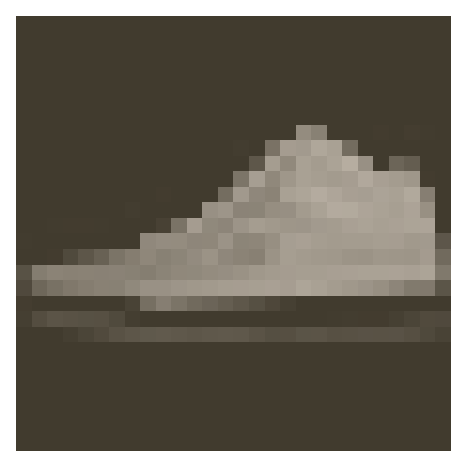

In [2]:
# Transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Downlod train data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Check one image ...
image, label = next(iter(trainloader))
helper.imshow(image[0,:])
print("Label class:\n", label[0])

## 3. The Model
The image is 28x28 pixels (784 total pixels) and we have 10 classes. We will use one (two) hidden layer(s) with `relu` activation functions. For the output activation functions we will combine `LogSoftmax(dim=1)` with `nn.NLLLoss()`, yielding log probits, which can be transformed to probabilities using the exponential function on the losses.

Steps:
- Define parameters of the model (epochs, learnrate)
- Model architecture using `nn.Sequential()`
- Define the [criterion](http://pytorch.org/docs/master/nn.html#loss-functions) (i.e. `nn.CrossEntropyLoss`) and 
- Define the [optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).
- Optimization
 - load images
 - forward pass
 - backward pass
 - adjust weights
 - repeat...

In [3]:
# Model parameters
epochs = 10
learnrate = 0.003

# mlp neural network
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Criterion
criterion = nn.NLLLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr = learnrate)

# time 
start_time = time()

# Optimization
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.reshape(images.shape[0], -1)
        optimizer.zero_grad()
        # Forward
        output = model.forward(images)
        loss = criterion(output, labels)
        # Backward
        loss.backward()
        optimizer.step()
        # Collect loss
        running_loss += loss.item()
        training_loss = running_loss/len(trainloader)
    else:
        print("Epoch ("+str(e+1)+"/"+str(epochs)+")")
        print("Training loss:", round(training_loss, 4))

end_time = time()
total_time = end_time - start_time
print("Total running time:\n", round(total_time,4))

Epoch (1/10)
Training loss: 0.4921
Epoch (2/10)
Training loss: 0.3863
Epoch (3/10)
Training loss: 0.3468
Epoch (4/10)
Training loss: 0.3318
Epoch (5/10)
Training loss: 0.3111
Epoch (6/10)
Training loss: 0.2994
Epoch (7/10)
Training loss: 0.2884
Epoch (8/10)
Training loss: 0.2759
Epoch (9/10)
Training loss: 0.2669
Epoch (10/10)
Training loss: 0.2604
Total running time:
 364.972


#### Testing the network
Take out an example image and check whether prediction is reasonable.

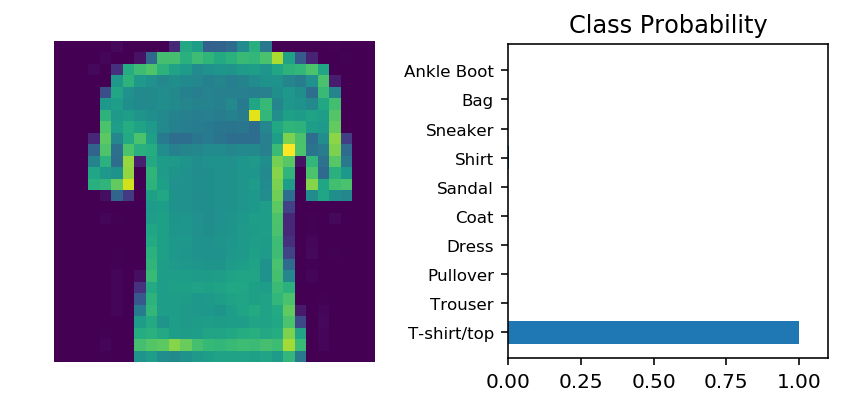

In [4]:
# Take out one image
images, labels = next(iter(testloader))
img = images[0]

# Flatten (2D to 1D)
img = img.reshape(img.shape[0], -1)

# probabilities
probs = torch.exp(model(img))

# Plot side by side
helper.view_classify(img.reshape(1,28,28), probs, version = "Fashion")

#### Results
So far it seems as if there is just a small training error and the network classifies the data in a pretty accurate way. 

---

## Neural Network as Class: Another representation using OOP
We can also formulate the nettwork as a class in Python (OOP).

In [5]:
# Model parameters
epochs = 5
learnrate = 0.003

# Define a class
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # flatten input
        x = x.reshape(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
    
# Initialize object of MLP
model = MLP()

# Model properties
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = learnrate)

# Optimization
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        # Forward
        output = model(images)
        loss = criterion(output, labels)
        # Backward
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        training_loss = running_loss / len(trainloader)
    else:
        print("Epoch ("+str(e+1)+"/"+str(epochs)+")")
        print("Training loss:", round(training_loss, 4))

Epoch (1/5)
Training loss: 0.512
Epoch (2/5)
Training loss: 0.3899
Epoch (3/5)
Training loss: 0.3595
Epoch (4/5)
Training loss: 0.3375
Epoch (5/5)
Training loss: 0.3179


#### Test Network

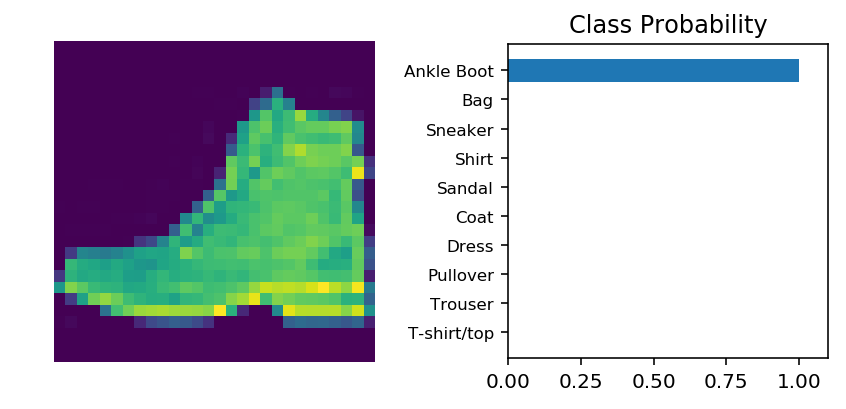

In [6]:
# load image
images, labels = next(iter(testloader))
img = images[0]

# probabilities
probs = torch.exp(model(img))

# plot
helper.view_classify(img, probs, version = "Fashion")

## Next steps:
Next, we'll have a look at the overall performance of the model. In particular, we will use learning curves to compare training vs testing data and include accuracy measures in the fitting process. This is important to have an idea how good the model is when it comes to unseen data (e.g. overfitting or Bias-Variance Tradeoff). Moreover, there are several tools to approach the problem of overfitting like dropout which we will use. 

### 4. Validation
- Goal of validation is to measure the model's performance on data that isn't part of the training set.
- Different performance measures can be chosen. This measure often depends on the specific objective of the problem. General measures are  `accuracy`  measures for [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context)) like the f-beta-score which allows different specifications.

In the following we will calculate the most likely class for the picture we have used before as well as the accuracy for one batch before including these measures directly in the optimization process. 

In [24]:
# Show probabilities
for p in probs:
    print(p.detach().numpy().round(4))
    
# Most likely class for each image in first batch
top_p, top_class = probs.topk(1, dim=1)

# compare predicted top class and labels
print("\nPredicted outcome:\n", top_class)
print("\nOutcome:\n",labels.reshape(64,1)[0])

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.000e-04 0.000e+00 9.998e-01]

Predicted outcome:
 tensor([[9]])

Outcome:
 tensor([9])


#### Batch accuracy
We will now look at one batch of picture, i.e. 64 images.

In [70]:
# Probabilities for one batch
probs = torch.exp(model(images))

# top-k
top_p, top_class = probs.topk(1, dim= 1)

# Compare top_class with labels, equate shape
comp = top_class == labels.reshape(*top_class.shape)
print("Boolean comparison. True if outcome as predicted:\n", comp[:5])

# Calculate Accuracy
acc = int(torch.sum(comp)) / comp.shape[0]
print("\nAccuracy:\n "+str(round(acc*100,2))+"%")

# Accuracy w numpy
acc2 = np.array(comp).mean()
print("\nacc == acc2?\n ", acc == acc2)

# Accuracy w float tensor
acc3 = torch.mean(comp.type(torch.FloatTensor))
print("\nacc2 == acc3?\n ", acc == acc2)

Boolean comparison. True if outcome as predicted:
 tensor([[1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.uint8)

Accuracy:
 85.94%

acc == acc2?
  True

acc2 == acc3?
  True


###  Include Validation in Training Process
After we have seen how accuracy can be measured with a model we want to directly include this in the training process. 

Steps:
- Train network and include validation
 - Turn off gradients for this since we're not updating the parameters and this significantly speeds up the process using `torch.no_grad()`

```python
# turn off gradients
with torch.no_grad():
    # validation here
    for images, labels in testloader:
        ...
```

In [86]:
# Model parameters
epochs = 15
learnrate = 0.003

# Initiate object of nn
model = MLP()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = learnrate)

# Track losses
train_losses = []
test_losses = []

# Gradient descent
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        # Forward
        output = model(images)
        loss = criterion(output, labels)
        # Backward
        loss.backward()
        # Adjust weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        acc = 0
        # Calculate accuracy
        with torch.no_grad():
            for images, labels in testloader:
                output = model(images)
                test_loss += criterion(output, labels)
                
                probs = torch.exp(output)
                top_p,top_class = probs.topk(1, dim=1)
                comp = top_class == labels.reshape(*top_class.shape)
                acc += torch.mean(comp.type(torch.FloatTensor))
        train_losses.append(running_loss / len(trainloader))
        test_losses.append(test_loss / len(testloader))
        
        Tr_L = running_loss/len(trainloader)
        TL = test_loss/len(testloader)
        T_acc = acc/len(testloader)
        
        print("Epoch: {}/{}".format(e+1, epochs))
        print("Training Loss:{:.3f} | Test Loss:{:.3f} | Test Accuracy:{:.3f}".format(Tr_L, TL, T_acc))     

Epoch: 1/15:
Training Loss:0.512 | Test Loss:0.457 | Test Accuracy:0.835
Epoch: 2/15:
Training Loss:0.390 | Test Loss:0.393 | Test Accuracy:0.857
Epoch: 3/15:
Training Loss:0.354 | Test Loss:0.396 | Test Accuracy:0.857
Epoch: 4/15:
Training Loss:0.329 | Test Loss:0.404 | Test Accuracy:0.857
Epoch: 5/15:
Training Loss:0.316 | Test Loss:0.406 | Test Accuracy:0.859
Epoch: 6/15:
Training Loss:0.302 | Test Loss:0.371 | Test Accuracy:0.869
Epoch: 7/15:
Training Loss:0.290 | Test Loss:0.395 | Test Accuracy:0.862
Epoch: 8/15:
Training Loss:0.287 | Test Loss:0.359 | Test Accuracy:0.873
Epoch: 9/15:
Training Loss:0.275 | Test Loss:0.375 | Test Accuracy:0.868
Epoch: 10/15:
Training Loss:0.268 | Test Loss:0.353 | Test Accuracy:0.880
Epoch: 11/15:
Training Loss:0.262 | Test Loss:0.406 | Test Accuracy:0.867
Epoch: 12/15:
Training Loss:0.256 | Test Loss:0.367 | Test Accuracy:0.876
Epoch: 13/15:
Training Loss:0.253 | Test Loss:0.382 | Test Accuracy:0.878
Epoch: 14/15:
Training Loss:0.243 | Test Loss:0

#### Training Curves
A training curves visualizes the training loss vs validation loss with more epochs. In general, both losses should gradually decrease over time. If this does not happen another look to figure out what's happening is required.

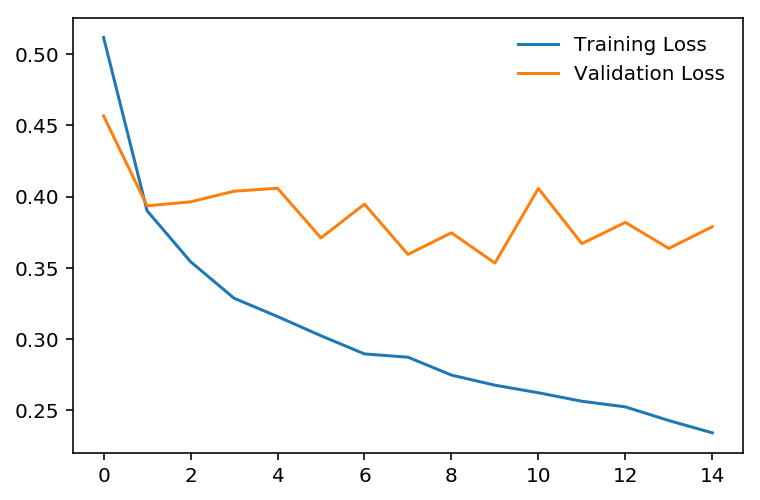

In [88]:
# Training curves
plt.plot(train_losses, label ="Training Loss")
plt.plot(test_losses, label ="Validation Loss")
plt.legend(frameon=False);

#### Result
From the graph we see that test accuracy only decreases to a certain point (around epoch 5), while training accuracy is decreasing gradually. After period 5 the validation loss even rose slightly or remains stable at a certain level.

What happens here is called overfitting. The network "memorizes" the data and fits them pretty well. Unfortunately, this is bad for the generalizability of the model. Therfore, the network does not perform as good on previously unseen data for validation. 

In general, we are not interested in the accuracy on the training data as this may lead to the wrong impression of a good performing model. What we want instead is a model that generalizes well on unseen data that it was not trained on. 

There are several ways to improve the generalizability of a mlp network:
- Early-stopping: Taking the model where the test loss is lowest (highest test accuracy). Hence, we'd train the model for more epochs than required and take out the weight specifications of the period when its performance was best. 
- Dropout: One of the most common methods to reduce overfitting is to randomly drop nodes from training. This forces the network to "share" information between weights, increasing its ability to generalize to new data. 

Next step:
- Adding dropout using `nn.Dropout` module to our MLP class. 

In [89]:
# MLP with dropout
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # Dropout
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # flatten input
        x = x.reshape(x.shape[0], -1)
        
        # add dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

Note that dropout is only used during trainig. For inference we want to use the entire network with all nodes. Therefore, we have to turn off dropout during evaluation and testing of the model. This can be done by changing to evaluation mode using `model.eval()` where the dropout proability is 0. Turn dropout back on by setting the model to train mode with `model.train()`.

```python
# turn off gradients
with torch.no_grad():
    
    # set model to evaluation mode
    model.eval()
    
    # validation pass here
    for images, labels in testloader:
        ...

# set model back to train mode
model.train()
```

We will now add this to the training process of the model.

Epoch: 1/15
Training Loss:0.603 | Test Loss:0.487 | Test Accuracy:0.822
Epoch: 2/15
Training Loss:0.481 | Test Loss:0.432 | Test Accuracy:0.850
Epoch: 3/15
Training Loss:0.450 | Test Loss:0.434 | Test Accuracy:0.845
Epoch: 4/15
Training Loss:0.431 | Test Loss:0.401 | Test Accuracy:0.860
Epoch: 5/15
Training Loss:0.421 | Test Loss:0.453 | Test Accuracy:0.848
Epoch: 6/15
Training Loss:0.419 | Test Loss:0.397 | Test Accuracy:0.864
Epoch: 7/15
Training Loss:0.408 | Test Loss:0.382 | Test Accuracy:0.861
Epoch: 8/15
Training Loss:0.400 | Test Loss:0.399 | Test Accuracy:0.859
Epoch: 9/15
Training Loss:0.390 | Test Loss:0.385 | Test Accuracy:0.866
Epoch: 10/15
Training Loss:0.396 | Test Loss:0.392 | Test Accuracy:0.860
Epoch: 11/15
Training Loss:0.386 | Test Loss:0.395 | Test Accuracy:0.866
Epoch: 12/15
Training Loss:0.378 | Test Loss:0.382 | Test Accuracy:0.867
Epoch: 13/15
Training Loss:0.383 | Test Loss:0.394 | Test Accuracy:0.858
Epoch: 14/15
Training Loss:0.375 | Test Loss:0.381 | Test Ac

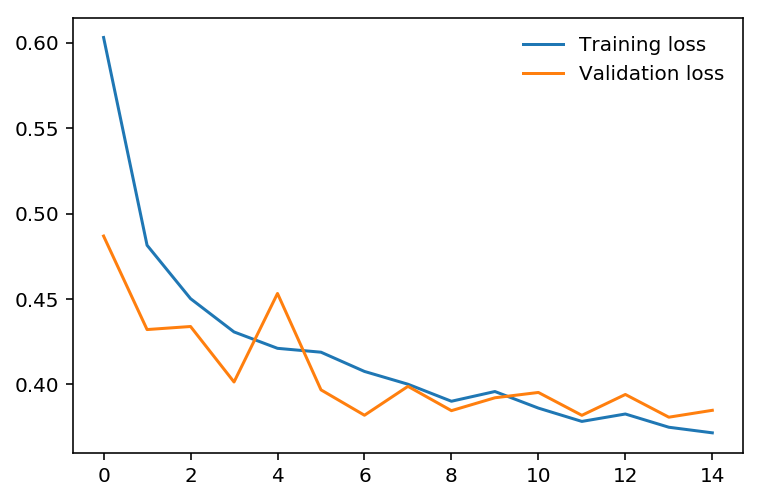

In [91]:
# Model specifications
epochs = 15
model = MLP()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

# Track losses
train_losses, test_losses = [], []

# Optimization
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        # Forward
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        # Backwards
        loss.backward()
        # Adjust weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        acc = 0
        # Turn off gradients for validation
        with torch.no_grad():
            # Turn off dropout
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                acc += torch.mean(equals.type(torch.FloatTensor))
        # Turn training mode back on
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        Tr_L = running_loss/len(trainloader)
        TL = test_loss/len(testloader)
        T_acc = acc/len(testloader)
        
        print("Epoch: {}/{}".format(e+1, epochs))
        print("Training Loss:{:.3f} | Test Loss:{:.3f} | Test Accuracy:{:.3f}".format(Tr_L, TL, T_acc))  

#### New Training Curves

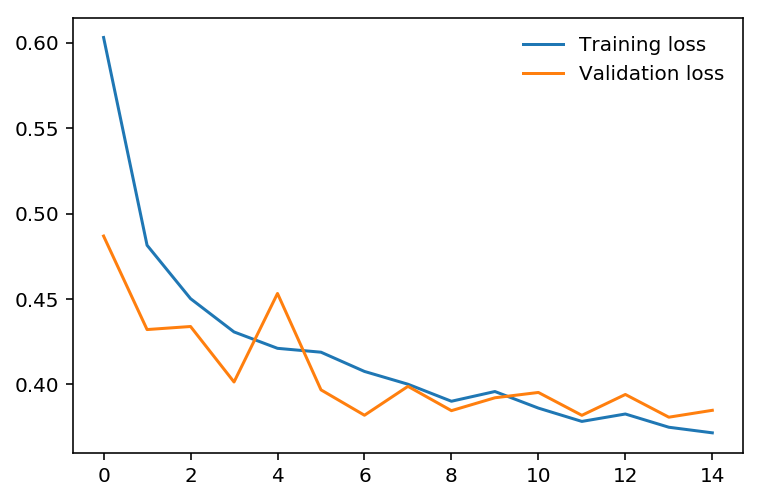

In [92]:
# New training curves
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False);

#### Results with Dropout
Testing and Training accuracy are close to each other indicating a better generalizability of the model. 

#### Inference 
Model is now trained with dropout and can be used for inference with two minor adjustments. Set the model in inference mode and turn off autograd:
* Evaluation mode: `model.eval()`
* Turn off autograd with `torch.no_grad()`.

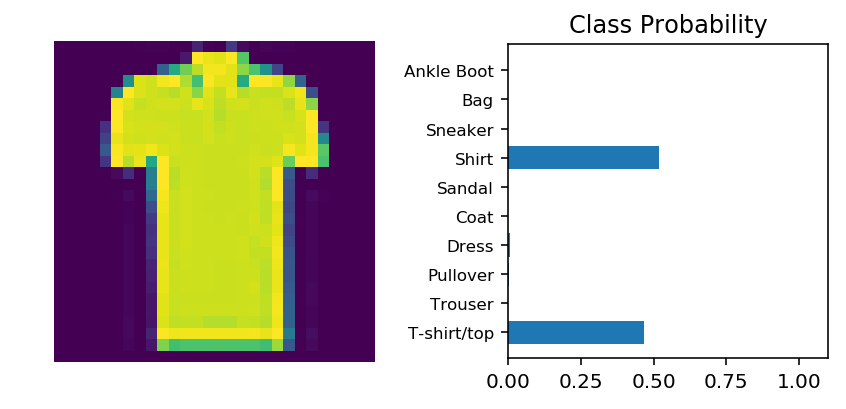

In [111]:
# Eval mode
model.eval()

# Load image
images, labels = next(iter(testloader))
img = images[16]

# Reshape
img = img.reshape(1, 784)

# Loss
with torch.no_grad():
    output = model.forward(img)
    
prob = torch.exp(output)

# Plot
helper.view_classify(img.view(1,28,28), prob, version ="Fashion")

### Next:
- Saving and loading previously trained models
- Prepare and load (own) Image data